In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

**When we look at any image, most of the time we identify a person using a face. An image might contain multiple faces, also the face can be obstructed and not clear. The first step in our pre-processing pipeline is to detect faces from an image. Once face is detected, we will detect eyes, if two eyes are detected then only we keep that image otherwise discard it**

In [2]:
img = cv2.imread('C:\\CODE1\\model\\test_images\\Kiara-Advani-Photo.jpg')
img.shape

(750, 600, 3)

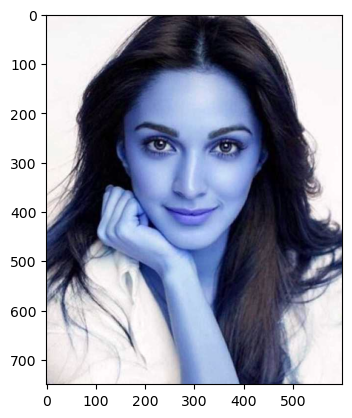

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(750, 600)

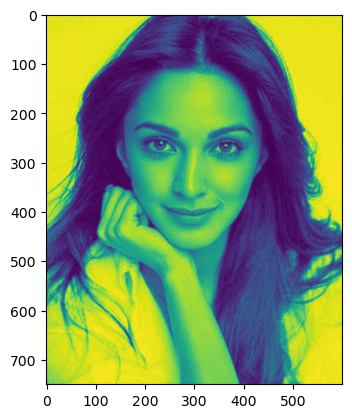

In [5]:
plt.imshow(gray)

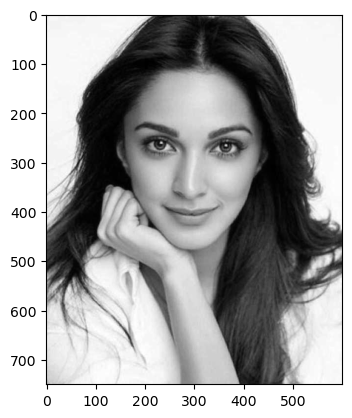

In [6]:
plt.imshow(gray, cmap='gray')



In [7]:
gray


array([[242, 241, 240, ..., 244, 244, 244],
       [242, 241, 240, ..., 244, 244, 244],
       [242, 241, 240, ..., 244, 244, 244],
       ...,
       [188, 186, 185, ..., 248, 248, 248],
       [189, 188, 185, ..., 248, 248, 248],
       [189, 187, 185, ..., 248, 248, 248]], dtype=uint8)

In [8]:
face_cascade = cv2.CascadeClassifier('C:\\CODE1\\model\\openCV\\Harcasscades\\haar-cascade-files-master\\haar-cascade-files-master\\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:\\CODE1\\model\\openCV\\Harcasscades\\haar-cascade-files-master\\haar-cascade-files-master\haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[129, 140, 337, 337]])

In [9]:
x,y,w,h = faces[0]
x,y,w,h #x cordinate, y co , width , height

(129, 140, 337, 337)

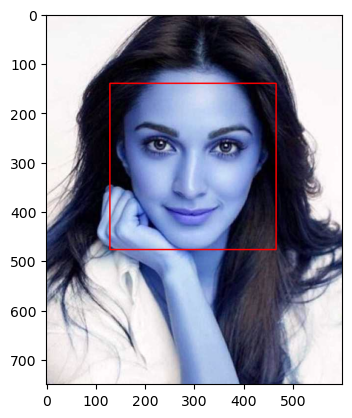

In [10]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)


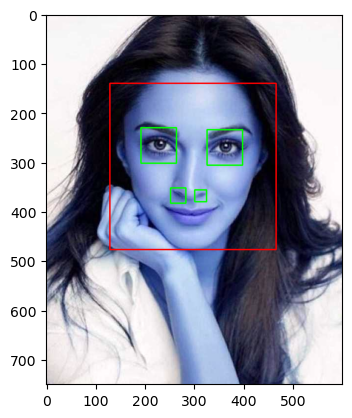

In [11]:
#from openCV documentation
cv2.destroyAllWindows()
for (x,y,w,h) in faces: #here we have only 1 face, we used loop if incase if we have 2 faces in img
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

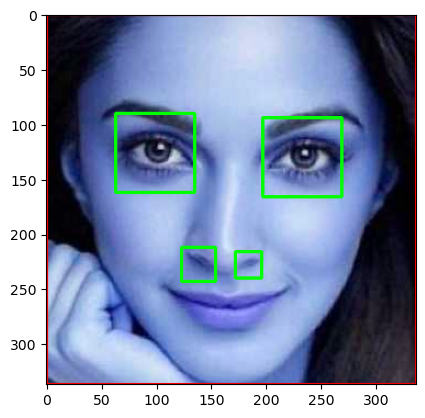

In [12]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

**lets write a function which takes image as input ang return the cropped image whiche has 2 or more than 2 eyes**  

In [13]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

**lets pass the same test image as input and see if it is doing good or not**

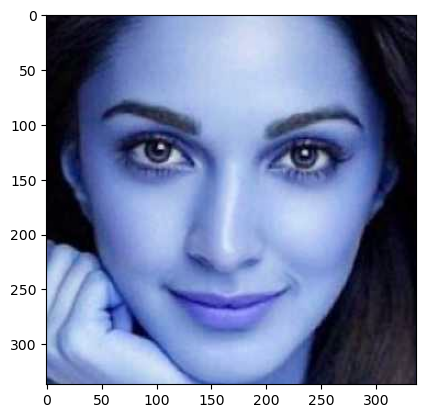

In [14]:
cropped_image = get_cropped_image_if_2_eyes('C:\\CODE1\\model\\test_images\\Kiara-Advani-Photo.jpg')#path of same kiara test image
plt.imshow(cropped_image)

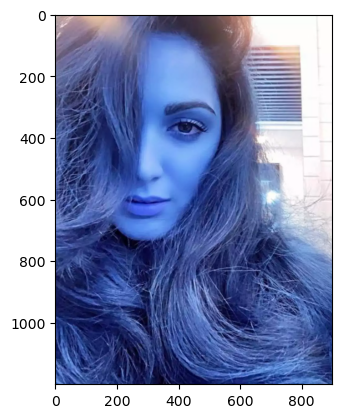

In [15]:
#lets check the function with image in which eyes are not clear
org_image_obstructed = cv2.imread('C:\\CODE1\\model\\test_images\\12.jpg')
plt.imshow(org_image_obstructed)

In [16]:
#lets check if the above image is good or not
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('C:\\CODE1\\model\\test_images\\12.jpg')
cropped_image_no_2_eyes


 **it is not returning anything since it cant identify 2eyes
so we dont use these kind of images in our modal traing**

In [17]:
#creating paths
path_to_data = "C:\\CODE1\\model\\Datasets\\"
path_to_cr_data = "C:\\CODE1\\model\\Datasets\\cropped\\"

In [18]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [19]:
img_dirs

['C:\\CODE1\\model\\Datasets\\Christopher Nolan',
 'C:\\CODE1\\model\\Datasets\\Jordan Peterson',
 'C:\\CODE1\\model\\Datasets\\Kiara advani',
 'C:\\CODE1\\model\\Datasets\\Mahesh babu',
 'C:\\CODE1\\model\\Datasets\\zKeanu Reeves']

In [20]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)#this line removes the cropped folder
os.mkdir(path_to_cr_data)#this line again creates the cropped folder
#this deletion is useful to delete the cropped images in the folder that are generated in previous runs of model

In [21]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('\\')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + '\\' + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1   

Christopher Nolan
Generating cropped images in folder:  C:\CODE1\model\Datasets\cropped\Christopher Nolan
Jordan Peterson
Generating cropped images in folder:  C:\CODE1\model\Datasets\cropped\Jordan Peterson
Kiara advani
Generating cropped images in folder:  C:\CODE1\model\Datasets\cropped\Kiara advani
Mahesh babu
Generating cropped images in folder:  C:\CODE1\model\Datasets\cropped\Mahesh babu
zKeanu Reeves
Generating cropped images in folder:  C:\CODE1\model\Datasets\cropped\zKeanu Reeves


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


**Go through the cropped files and perform the manual deletion**


select the images which are of others and delete them

**WAVELET TRANSFORMATION**

Now we have to perform wavelet tramsformation

Wavelet transformation allows us to extract features from the images
there are many methods of extracting features form images and WAVELET  transformation is one of the best ways to do feature extraction from the images  

In [31]:
celebrity_file_names_dict


{'Christopher Nolan': ['C:\\CODE1\\model\\Datasets\\cropped\\Christopher Nolan\\Christopher Nolan1.png',
  'C:\\CODE1\\model\\Datasets\\cropped\\Christopher Nolan\\Christopher Nolan2.png',
  'C:\\CODE1\\model\\Datasets\\cropped\\Christopher Nolan\\Christopher Nolan3.png',
  'C:\\CODE1\\model\\Datasets\\cropped\\Christopher Nolan\\Christopher Nolan4.png',
  'C:\\CODE1\\model\\Datasets\\cropped\\Christopher Nolan\\Christopher Nolan5.png',
  'C:\\CODE1\\model\\Datasets\\cropped\\Christopher Nolan\\Christopher Nolan6.png',
  'C:\\CODE1\\model\\Datasets\\cropped\\Christopher Nolan\\Christopher Nolan7.png',
  'C:\\CODE1\\model\\Datasets\\cropped\\Christopher Nolan\\Christopher Nolan8.png',
  'C:\\CODE1\\model\\Datasets\\cropped\\Christopher Nolan\\Christopher Nolan9.png',
  'C:\\CODE1\\model\\Datasets\\cropped\\Christopher Nolan\\Christopher Nolan10.png',
  'C:\\CODE1\\model\\Datasets\\cropped\\Christopher Nolan\\Christopher Nolan11.png',
  'C:\\CODE1\\model\\Datasets\\cropped\\Christopher N

In [32]:
#we are crreating a dictionary to assign a number to each celebrity
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count += 1
class_dict

{'Christopher Nolan': 0,
 'Jordan Peterson': 1,
 'Kiara advani': 2,
 'Mahesh babu': 3,
 'zKeanu Reeves': 4}

**function for wavelet transformation**

In [33]:
#code from stack overflow
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [34]:
'''
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
this piece is from above
'''

cropped_img = np.array(roi_color)


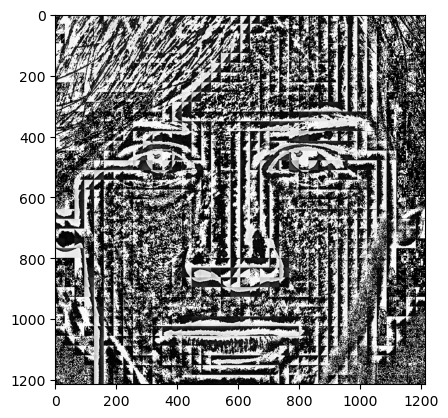

In [35]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

# Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

we will vertically stack both raw and wavelet images using np.vstack method
we do this vertical stacking because we use the features extracted from both the images

In [36]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img,(32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har,(32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1))) #flattening the arrays of 1 column and multiple rows
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  #class_dict is a dictionary for assingned numbers for each celebrity

In [37]:
#now we have X,y
len(X) #it is a list
#output tells us about no of images that are present for training the modal 

233

In [38]:
X[0] #it represents each image

array([[ 82],
       [103],
       [102],
       ...,
       [219],
       [ 40],
       [248]], dtype=uint8)

In [39]:
len(X[0])

4096

In [40]:
(32*32*3)+32*32
# raw image + wavelet image, since we combined the both images

4096

In [41]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

**convering the list X into numpy array of float datatype**

In [42]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(233, 4096)

*we are done with data cleaning*

# Model Training

In [43]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [45]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8305084745762712

In [47]:
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.50      0.80      0.62         5
           2       0.92      0.79      0.85        14
           3       0.79      0.88      0.83        17
           4       1.00      0.86      0.92        14

    accuracy                           0.83        59
   macro avg       0.82      0.82      0.81        59
weighted avg       0.86      0.83      0.84        59



**Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters**

In [48]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [49]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [50]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.832941,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.700336,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.867395,{'logisticregression__C': 1}


In [51]:
best_estimators['svm']

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=1, gamma='auto', kernel='linear', probability=True))])

** we got SVC as the best algorithm to train this model with SVC(C=1, gamma='auto', kernel='linear', probability=True) as the best parameters **

In [52]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8983050847457628

In [53]:
best_estimators['random_forest'].score(X_test,y_test)

0.6949152542372882

In [54]:
best_estimators['svm'].score(X_test,y_test)

0.864406779661017

In [55]:
best_clf = best_estimators['svm']

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 7,  2,  0,  0,  0],
       [ 1,  4,  0,  0,  0],
       [ 0,  0, 12,  2,  0],
       [ 0,  1,  1, 15,  0],
       [ 1,  0,  0,  0, 13]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

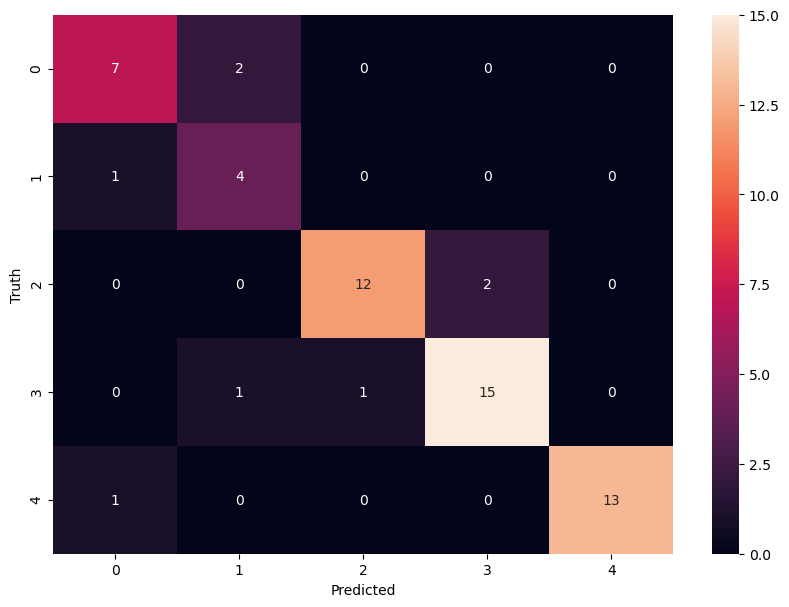

In [57]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [58]:
class_dict

{'Christopher Nolan': 0,
 'Jordan Peterson': 1,
 'Kiara advani': 2,
 'Mahesh babu': 3,
 'zKeanu Reeves': 4}

**LETS SAVE THE MODEL AND CLASS_DICT**

In [59]:
!pip install joblib

In [60]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [61]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))